# Tutorial 04: overview of **compose** stages



In [1]:
import pandas as pd
from PIL import Image
import electricmayhem.whitebox as em

ModuleNotFoundError: No module named 'electricmayhem'

Load a test image and a test mask...

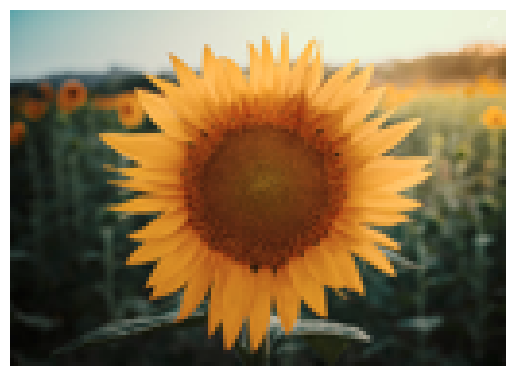

In [2]:
flower = em.load_to_tensor(Image.open("data/flower2.png").resize((128,92)))
em.plot(flower)

## `em.KorniaAugmentationPipeline`

In [3]:
aug_params = {
    "ColorJiggle":{"brightness":0.2, "contrast":0.2, "hue":0.1, "saturation":0.2},
    "RandomAffine":{"degrees":180, "shear":10, "scale":(0.25, 1), "padding_mode":"reflection"}
}
aug = em.KorniaAugmentationPipeline(aug_params)

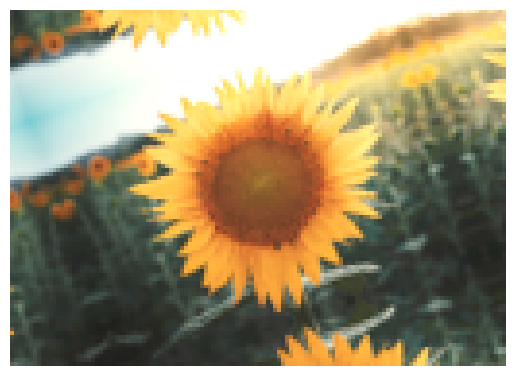

In [4]:
augmented, _ = aug(flower.unsqueeze(0))
em.plot(augmented[0])

In [5]:
aug.validate(flower.unsqueeze(0))

True

In [6]:
aug.get_last_sample_as_dict()

{'ColorJiggle_0_brightness_factor': [0.8845271468162537],
 'ColorJiggle_0_contrast_factor': [1.1171214580535889],
 'ColorJiggle_0_hue_factor': [0.060396336019039154],
 'ColorJiggle_0_saturation_factor': [1.1501208543777466],
 'RandomAffine_1_translations_0': [0.0],
 'RandomAffine_1_translations_1': [0.0],
 'RandomAffine_1_center_0': [63.5],
 'RandomAffine_1_center_1': [45.5],
 'RandomAffine_1_scale_0': [0.5369653701782227],
 'RandomAffine_1_scale_1': [0.5369653701782227],
 'RandomAffine_1_angle': [-41.429229736328125],
 'RandomAffine_1_shear_x': [-9.887933731079102],
 'RandomAffine_1_shear_y': [0.0]}

In [8]:
import json
print(json.dumps(aug.get_last_sample_as_dict()))

{"ColorJiggle_0_brightness_factor": [0.8845271468162537], "ColorJiggle_0_contrast_factor": [1.1171214580535889], "ColorJiggle_0_hue_factor": [0.060396336019039154], "ColorJiggle_0_saturation_factor": [1.1501208543777466], "RandomAffine_1_translations_0": [0.0], "RandomAffine_1_translations_1": [0.0], "RandomAffine_1_center_0": [63.5], "RandomAffine_1_center_1": [45.5], "RandomAffine_1_scale_0": [0.5369653701782227], "RandomAffine_1_scale_1": [0.5369653701782227], "RandomAffine_1_angle": [-41.429229736328125], "RandomAffine_1_shear_x": [-9.887933731079102], "RandomAffine_1_shear_y": [0.0]}


## `em.PerspectiveTilter`

This stage has a much narrower range of application- wrapping `kornia`'s perspective warping tools to make an image look like it's falling back away from the camera (for example, if you wanted to make an image appear to be off-nadir)

In [19]:
tilt = em.PerspectiveTilter()

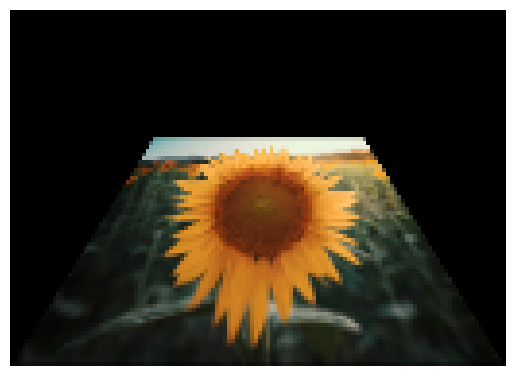

In [23]:
tilted, _ = tilt(flower.unsqueeze(0))
em.plot(tilted[0])